# Immunization Data Analysis (2017) - CDC Dataset

# Overview
This project involves analyzing the 2017 immunization data from the CDC to explore various aspects of children's immunization status, vaccination rates, and demographic factors such as mother's education level, whether children were fed breastmilk, and the relationship between vaccination and disease occurrence.



In [42]:
#Importing Libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

## Proportion of Education Levels
The proportion of children in the dataset who had a mother with the education levels equal to less than high school (<12), high school (12), more than high school but not a college graduate (>12) and college degree.

In [19]:


def proportion_of_education():
    # Load the dataset
    df = pd.read_csv('NISPUF17.csv')
    
    # Create the Series of the Education variable
    edu = df['EDUC1']
    
    # Initialize the education level dictionary
    education_level = pd.Series({"less than high school": 0,
                                "high school": 0,
                                "more than high school but not college": 0,
                                "college": 0})
    
    # Iterate over the education values and count occurrences
    for label, value in edu.items():  # Use items() instead of iteritems()
        education_level[value - 1] += 1  # Increment the appropriate education level
    
    # Normalize the counts to get proportions and round off to 1 decimal place
    education_level = education_level.apply(lambda x: round(x / len(edu), 1))
    
    # Return the proportions as a dictionary
    return education_level.to_dict()

# Call the function and print the result
education_proportions = proportion_of_education()
print(education_proportions)



C:\Users\PMLS\AppData\Local\Temp\ipykernel_54732\359660575.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  education_level[value - 1] += 1  # Increment the appropriate education level
C:\Users\PMLS\AppData\Local\Temp\ipykernel_54732\359660575.py:20: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  education_level[value - 1] += 1  # Increment the appropriate education level


{'less than high school': 0.1, 'high school': 0.2, 'more than high school but not college': 0.2, 'college': 0.5}


### Explanation :
1. The majority of children (50%) had mothers with a college degree, indicating a significant level of higher education in the dataset.
2. Only 10% of children had mothers with less than a high school education, highlighting a smaller proportion of lower educational attainment.
3. This distribution suggests that maternal education levels are skewed towards higher education in this sample.

We’ll visualize the distribution of mother’s education levels using a bar plot.



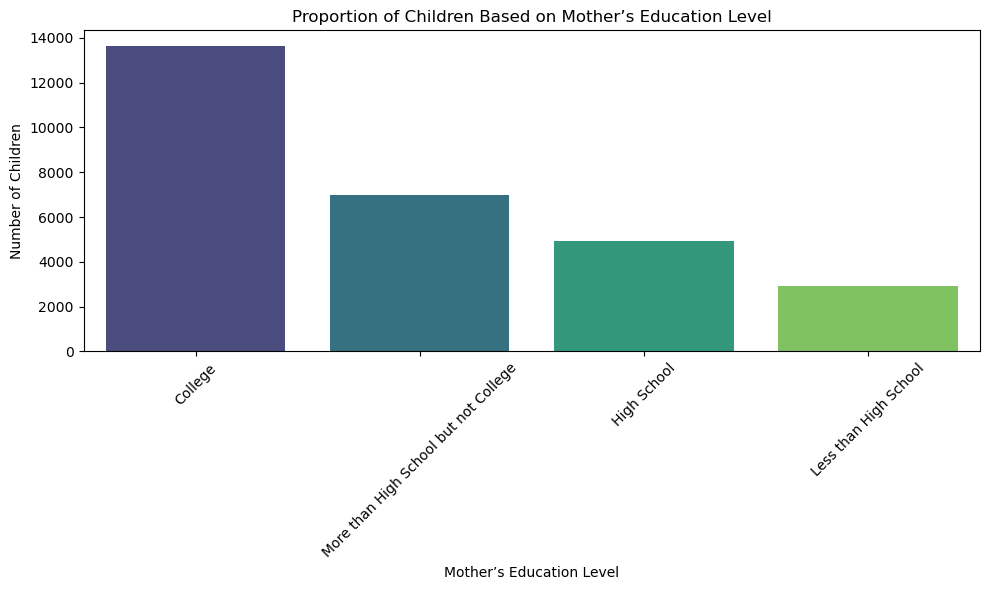

In [43]:
df = pd.read_csv('NISPUF17.csv')

# Plotting the education levels of mothers
education_levels = df['EDUC1'].value_counts()  # Assuming 'EDUC1' contains education levels

# Mapping education level codes to human-readable categories (check dataset documentation for exact mappings)
education_labels = {
    1: 'Less than High School',  # Example: Adjust based on actual dataset mappings
    2: 'High School',
    3: 'More than High School but not College',
    4: 'College'
}

education_levels = education_levels.rename(education_labels)

# Plot the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=education_levels.index, y=education_levels.values, palette="viridis")
plt.title('Proportion of Children Based on Mother’s Education Level')
plt.xlabel('Mother’s Education Level')
plt.ylabel('Number of Children')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Breastmilk and Influenza Vaccination
Calculating the average number of seasonal influenza vaccinations received by children who were fed breastmilk versus those who were not fed breastmilk.

In [16]:
def average_influenza_doses():
    df = pd.read_csv('NISPUF17.csv')
    
    # Calculate the mean for children who were and were not breastfed
    breastfed_mean = df[df['CBF_01'].eq(1)]['P_NUMFLU'].mean()
    not_breastfed_mean = df[df['CBF_01'].eq(2)]['P_NUMFLU'].mean()
    
    # Round the results to 1 decimal place
    return round(breastfed_mean, 1), round(not_breastfed_mean, 1)

# Call the function and print the result
print(average_influenza_doses())


(1.9, 1.6)


### Explaination 
The result indicates that children who were breastfed as infants received an average of *1.9* influenza vaccine doses, while those who were not breastfed received an average of *1.6* doses. This suggests a possible association between breastfeeding and higher rates of influenza vaccination.

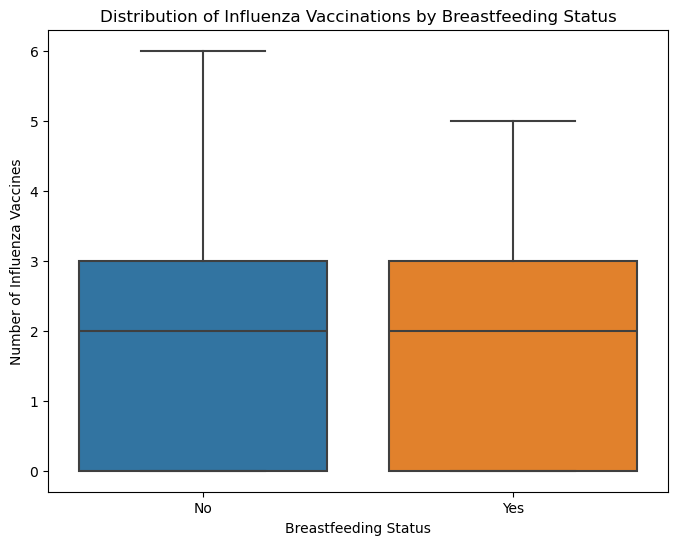

In [48]:
# Filter the dataset for children who were or weren't fed breast milk
df_breastfed = df[df['CBF_01'].isin([1, 2])]  # 1: Yes, 2: No

# Create a boxplot to compare the number of influenza vaccine doses (P_NUMFLU) between the two groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='CBF_01', y='P_NUMFLU', data=df_breastfed)

# Set labels for the plot
plt.xticks([0, 1], ['No', 'Yes'])  # 0 -> No, 1 -> Yes for breastfeeding
plt.xlabel('Breastfeeding Status')
plt.ylabel('Number of Influenza Vaccines')
plt.title('Distribution of Influenza Vaccinations by Breastfeeding Status')

# Show the plot
plt.show()


## Vaccine Effectiveness and Gender
Analyzing the relationship between vaccine effectiveness (based on varicella doses) and the sex of the child. The function calculates the ratio of children who contracted chickenpox but were vaccinated against it, comparing this ratio by sex.

In [32]:
def chickenpox_by_sex():
    # YOUR CODE HERE
    df = pd.read_csv('NISPUF17.csv')
    rationbyGender = pd.Series({"male" : 0,
                            "female" : 0})
    takenVdoses = df[df['P_NUMVRC'].ge(1)] # Grabs only those who had varicella doses
    male = takenVdoses[takenVdoses['SEX'].eq(1)] # separetes by sex
    female = takenVdoses[takenVdoses['SEX'].eq(2)]
    ratioMale = len(male[male['HAD_CPOX'].eq(1)])/len(male[male['HAD_CPOX'].eq(2)]) # Had ratio by who didn't. 
    ratioFemale = len(female[female['HAD_CPOX'].eq(1)])/len(female[female['HAD_CPOX'].eq(2)])

    rationbyGender.iloc[0] = ratioMale
    rationbyGender.iloc[1] = ratioFemale
    return rationbyGender.to_dict()
print(chickenpox_by_sex())

{'male': 0.009675583380762664, 'female': 0.0077918259335489565}


C:\Users\PMLS\AppData\Local\Temp\ipykernel_54732\3339410820.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.009675583380762664' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  rationbyGender.iloc[0] = ratioMale


### Explaination: 
This output represents the ratio of children who contracted chickenpox despite being vaccinated (at least one varicella dose) to those vaccinated but did not contract chickenpox, separated by gender. The ratio for males is approximately **0.0097**, and for females, it is approximately **0.0078**, indicating slightly higher likelihood in males.

## Correlation Between Chickenpox and Vaccine Doses
Calculating the correlation between having had chickenpox and the number of varicella vaccine doses given. The function also calculates the p-value to assess the statistical significance of the correlation.

In [37]:
def corr_chickenpox():    
    # Filtering the Data Frame to get the values desired
    df = pd.read_csv('NISPUF17.csv')
    df_corr = df[df['HAD_CPOX'].eq(1) | df['HAD_CPOX'].eq(2)]
    df_corr = df_corr[['HAD_CPOX', 'P_NUMVRC']].dropna()
    #print(df_corr.head())
    
    # here is some stub code to actually run the correlation
    corr, pval=stats.pearsonr(df_corr["HAD_CPOX"],df_corr['P_NUMVRC'])
    #print(pval)
    # just return the correlation
    return round(corr,2) 


In [38]:
print(corr_chickenpox())

0.07


### Explaination:
The correlation value 0.0704 indicates a weak positive relationship between having had chickenpox and the number of varicella vaccine doses given. This suggests that the vaccine dosage has a minimal impact on the likelihood of having had chickenpox, and other factors may be influencing the outcome.

## Visualize the number of doses for different vaccines 

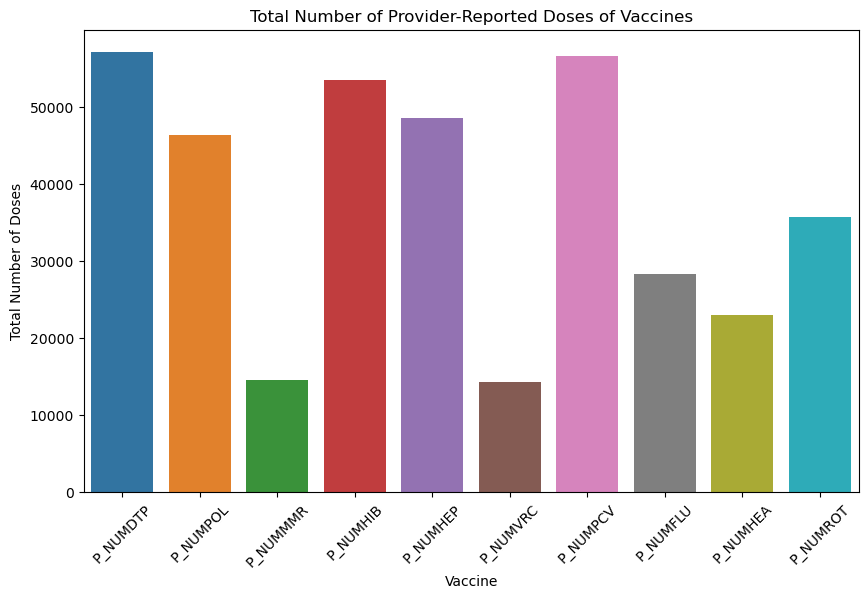

In [49]:
# List of columns related to the number of vaccine doses
vaccine_columns = ['P_NUMDTP', 'P_NUMPOL', 'P_NUMMMR', 'P_NUMHIB', 'P_NUMHEP', 'P_NUMVRC', 'P_NUMPCV', 'P_NUMFLU', 'P_NUMHEA', 'P_NUMROT']

# Calculate the total number of doses for each vaccine
vaccine_sums = df[vaccine_columns].sum()

# Create a bar plot to visualize the total number of doses for each vaccine
plt.figure(figsize=(10, 6))
sns.barplot(x=vaccine_sums.index, y=vaccine_sums.values)

# Set labels and title for the plot
plt.xlabel('Vaccine')
plt.ylabel('Total Number of Doses')
plt.title('Total Number of Provider-Reported Doses of Vaccines')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


### Explaination:
1. The vaccine_columns list includes the columns that represent the number of doses for various vaccines (e.g., DTaP, polio, MMR, etc.).
2. We calculate the total number of doses for each vaccine using df[vaccine_columns].sum().
3. A bar plot is created to visualize the total number of doses for each vaccine.
4. The x-axis represents the vaccines, and the y-axis represents the total number of doses.